In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Working with a larger example

When you have more than two classes as an option, it's known as **multiclass classification**

To practice multi-class classification we're going to be a neural network to classify clothes `fashion_mnist`.

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
# Show the first training example
print(f'Training Example:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training Example:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [4]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

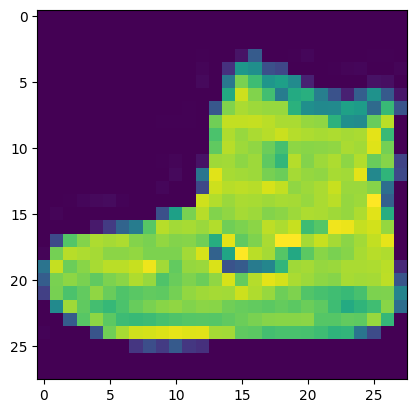

In [7]:
# Plot a single sample
plt.imshow(train_data[0])

In [3]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'Coat')

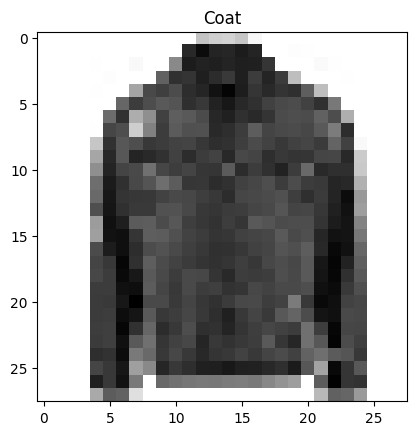

In [15]:
# Plot an example image and its label
index = 29
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

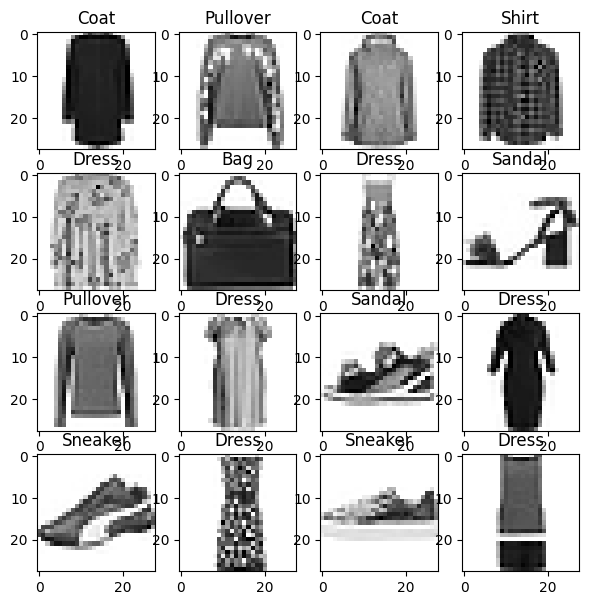

In [20]:
# Plot multiple random images of fashion MNIST
import random
choices = range(len(train_data))
plt.figure(figsize=(7, 7))
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    rand_index = random.choice(choices)
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])

## Building a multi-class classification model

For our multi-class classification we need to tweak the following:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = `tf.keras.losses.CategoricalCrossentropy()` for one-hot data
    * `tf.keras.losses.SparseCategoricalCrossentropy()` for numerical data
* Output layer activation = `Softmax` not `Sigmoid`

In [23]:
# Our data needs to be flattened from 28 x 28 (2D) to 784 (1D)
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28))
])

flatten_model.output_shape

(None, 784)

In [26]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# 3. Fit the model
non_norm_history = model.fit(train_data, 
                             tf.one_hot(train_labels, depth=10), 
                             epochs=10, 
                             validation_data=(test_data, tf.one_hot(test_labels, depth=10)))


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3598 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1015 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy:

In [27]:
# Check the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have numbers and tensors between 0 and 1.

In [4]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [32]:
# Check again
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [33]:
# Let's rebuild a model for the normalized data
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# 3. Fit the model
norm_history = model.fit(train_data_norm,
                             tf.one_hot(train_labels, depth=10),
                             epochs=10,
                             validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 1.2689 - accuracy: 0.5750 - val_loss: 0.8896 - val_accuracy: 0.7294
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7812 - accuracy: 0.7589 - val_loss: 0.7320 - val_accuracy: 0.7676
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6830 - accuracy: 0.7823 - val_loss: 0.6898 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6419 - accuracy: 0.7930 - val_loss: 0.6590 - val_accuracy: 0.7866
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6187 - accuracy: 0.7991 - val_loss: 0.6503 - val_accuracy: 0.7885
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6033 - accuracy: 0.8033 - val_loss: 0.6313 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.5910 - accuracy: 0.8068 - val_loss: 0.6337 - val_accuracy

🔑 **Note:** Neural networks tend to prefer data in the normalized form [0.0, 1.0]

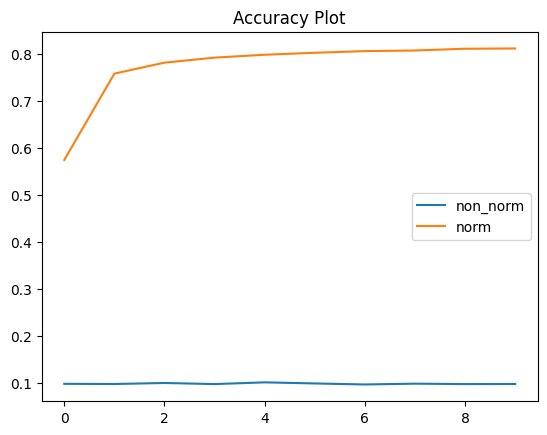

In [46]:
plt.plot(non_norm_history.history['accuracy'])
plt.plot(norm_history.history['accuracy'])
plt.title('Accuracy Plot')
plt.legend(['non_norm', 'norm'])
plt.show()

In [47]:
# Create a learning rate model
lr_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the learning_rate model
lr_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Create a callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model with the callback
lr_history = lr_model.fit(train_data_norm,
                          train_labels,
                          epochs=40,
                          validation_data=(test_data_norm, test_labels),
                          callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 3ms/step - loss: 1.1100 - accuracy: 0.5580 - val_loss: 0.7575 - val_accuracy: 0.7284 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6712 - accuracy: 0.7548 - val_loss: 0.6452 - val_accuracy: 0.7658 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6053 - accuracy: 0.7792 - val_loss: 0.6360 - val_accuracy: 0.7714 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5810 - accuracy: 0.7865 - val_loss: 0.6075 - val_accuracy: 0.7826 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5663 - accuracy: 0.7909 - val_loss: 0.5917 - val_accuracy: 0.7844 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5597 - accuracy: 0.7934 - val_loss: 0.6171 - val_accuracy: 0.7750 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the Ideal Learning Rate')

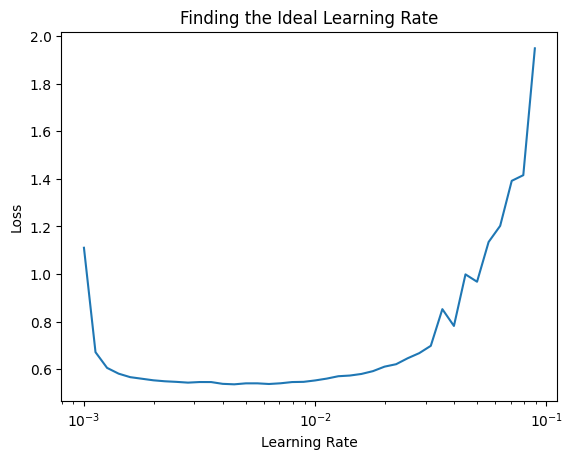

In [48]:
# Plot the learning rate decay curve
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, lr_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the Ideal Learning Rate')

The ideal learning rate is the default value

In [50]:
# Let's refit the model with the ideal learning rate
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])

# Fit the model
model.fit(train_data_norm,
          train_labels,
          epochs=20,
          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 1.2060 - accuracy: 0.5485 - val_loss: 0.9205 - val_accuracy: 0.6636
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8452 - accuracy: 0.6810 - val_loss: 0.8060 - val_accuracy: 0.6934
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7608 - accuracy: 0.7157 - val_loss: 0.7572 - val_accuracy: 0.7190
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7168 - accuracy: 0.7380 - val_loss: 0.7124 - val_accuracy: 0.7449
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6868 - accuracy: 0.7547 - val_loss: 0.6908 - val_accuracy: 0.7569
Epoch 6/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6591 - accuracy: 0.7686 - val_loss: 0.6771 - val_accuracy: 0.7636
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6350 - accuracy: 0.7786 - val_loss: 0.6557 - val_accuracy:

In [5]:
model = tf.keras.models.load_model('class_model.h5')

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we can:
* Evaluate using other metrics
* Assess some of its predictions
* Improve its results by changing the architecture

In [22]:
from plot_confusion_matrix import plot_confusion_matrix as pcm

In [6]:
# Make some predictions
y_probs = model.predict(test_data_norm)

y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

313/313 [==============================] - 1s 3ms/step


(array([7.6928622e-08, 3.3578395e-05, 5.3214149e-09, 8.5190118e-07,
        5.7119603e-10, 2.6357168e-01, 9.6499999e-09, 9.6986443e-02,
        1.9639953e-07, 6.3940722e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [8]:
# Convert all prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 2, 1, 4, 6, 5, 7], dtype=int64)

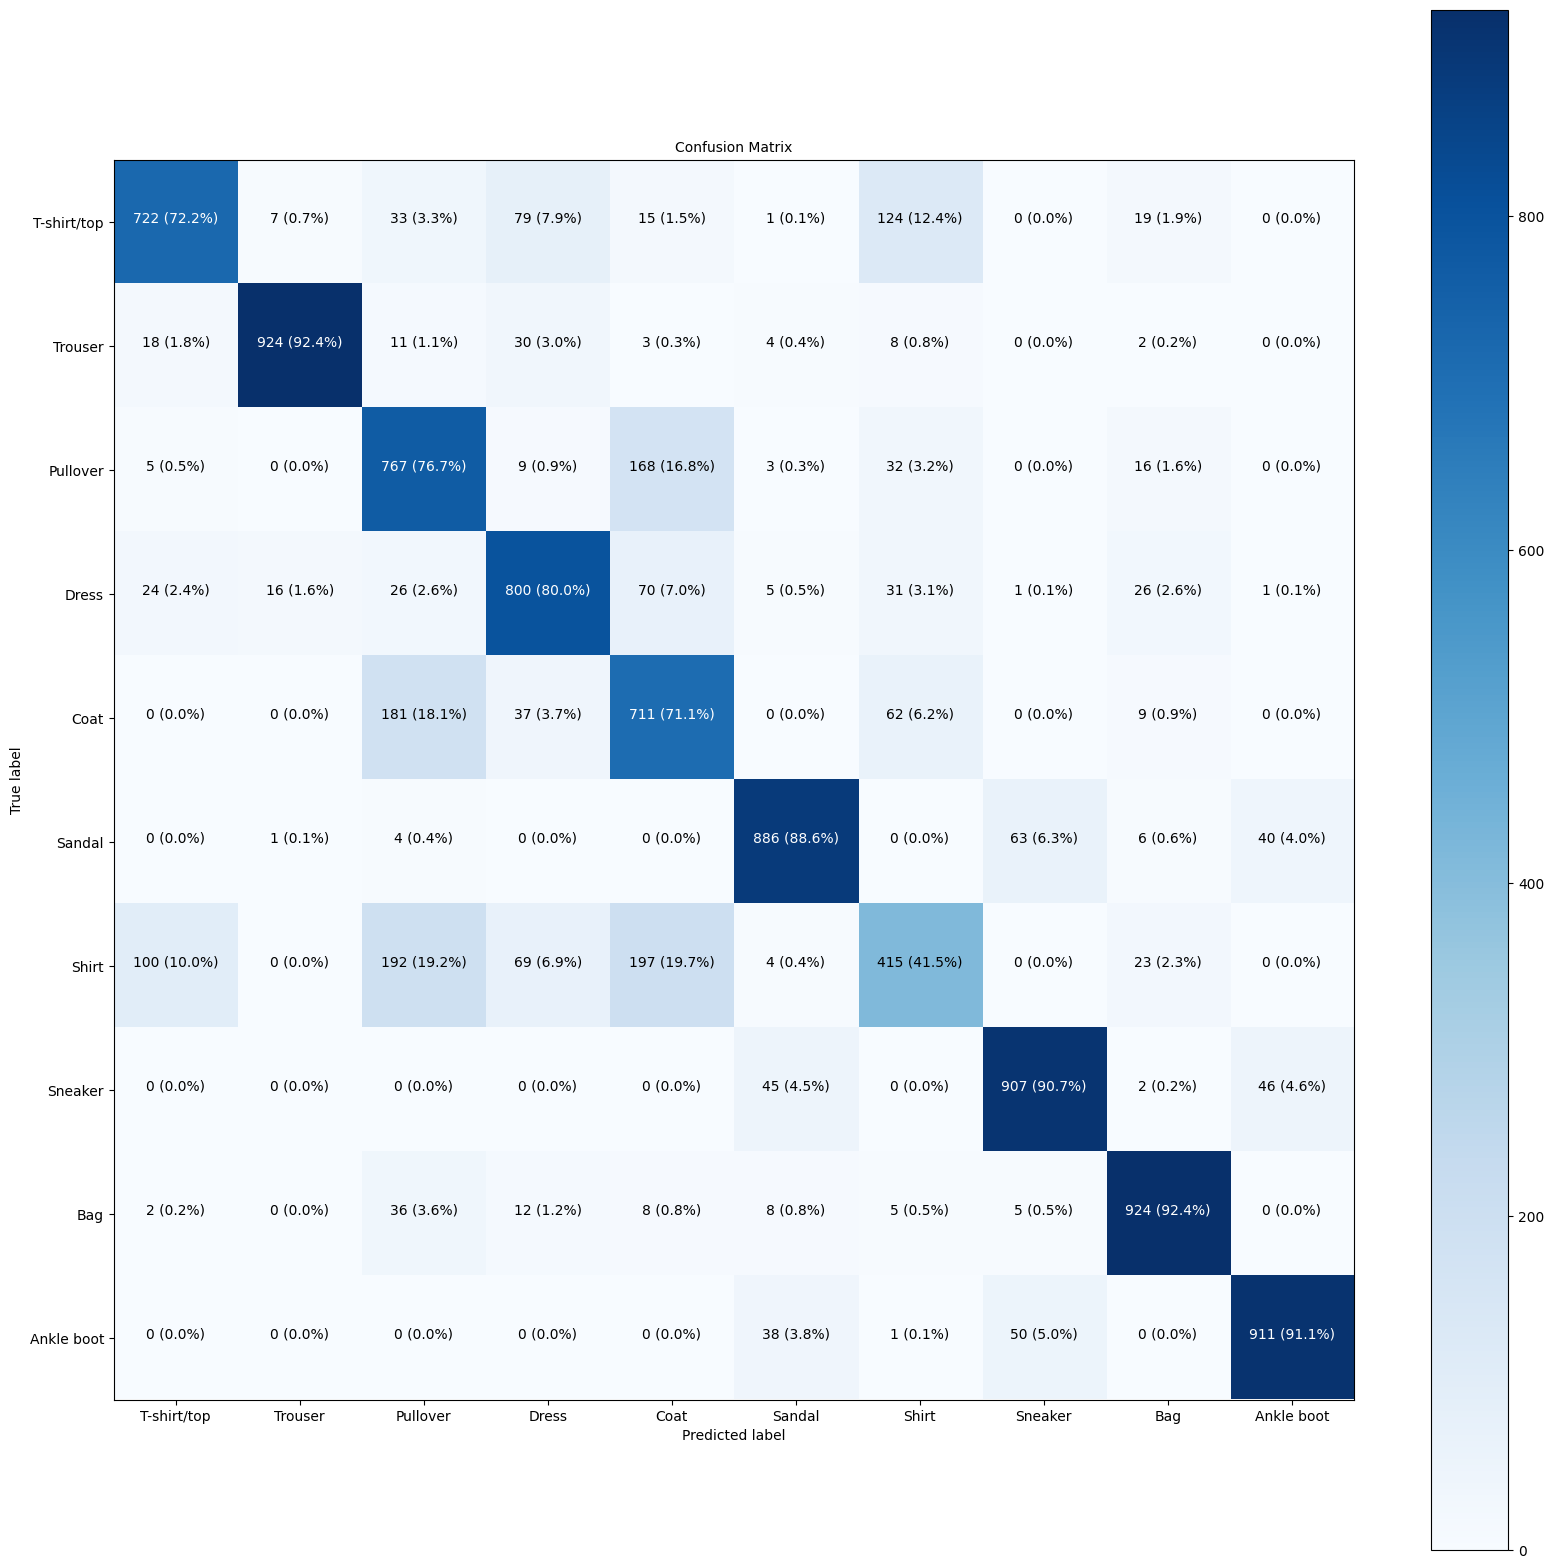

In [11]:
from plot_confusion_matrix import plot_confusion_matrix as pcm
pcm(y_true=test_labels,
    y_pred=y_preds,
    classes=class_names,
    figsize=(20, 20),
    text_size=10)